#### Regressão Linear

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
from sklearn import datasets
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict
from mlxtend.evaluate import bias_variance_decomp
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../mentoring-ml/datasets/startups.csv')

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.replace({'New York': 0, 'California':1, 'Florida': 2}, inplace=True)

In [6]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [366]:
data.duplicated().value_counts()

False    50
dtype: int64

In [247]:
data.describe()

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,0.980000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.820403,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


In [253]:
data.corr('pearson')

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.241955,0.724248,0.037930,0.972900
Administration,0.241955,1.000000,-0.032154,0.003026,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.137777,0.747766
State,0.037930,0.003026,0.137777,1.000000,0.048471
Profit,0.972900,0.200717,0.747766,0.048471,1.000000


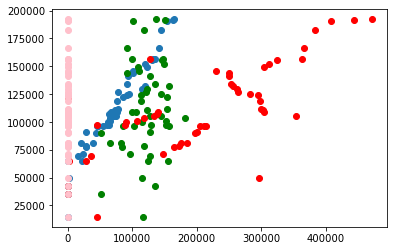

In [289]:
plt.scatter(data['R&D Spend'], data['Profit'])
plt.scatter(data['Administration'], data['Profit'], color= 'green')
plt.scatter(data['Marketing Spend'], data['Profit'], color = 'red')
plt.scatter(data['State'], data['Profit'], color = 'pink')

In [442]:
X = data.iloc[:, [2]].copy()
Y =  data.iloc[:, [4] ].copy()

In [8]:
data2 = data.values
X = data2[:, :-1]
Y = data2[:, -1]

In [26]:
scaler = MinMaxScaler()
scaler.fit(X, Y)
scaled = scaler.transform(X)

In [23]:
X2 = scaled[:, :-1]

In [116]:
# def get_kfold(x,y,k,model):
#     kfold = KFold(n_splits=k, shuffle=True)
#     result = cross_val_score(model,x , y, cv = kfold)
    
#     return result.mean()

##### Criando o modelo 

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [20]:
lr = lm.LinearRegression()
#model = lr.fit(x_train, y_train)
#predicted = lr.predict(x_test)

In [21]:
mse, bias, var = bias_variance_decomp(lr, x_train, y_train, x_test, y_test, loss='mse') 

In [22]:
print(mse, bias, var)

84282871.57007672 70519424.6089172 13763446.961159477


In [407]:
model.score(x_test, y_test)

0.45966078144657396

In [408]:
r2_score(y_test, predicted)

0.45966078144657396

In [409]:
mean_squared_error(y_test, predicted)

970710087.454642

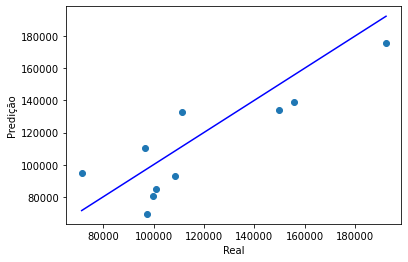

In [389]:
plt.scatter(y_test, predicted)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue')
plt.ylabel("Predição")
plt.xlabel("Real")
plt.show()

##### Validação cruzada - K-fold 

In [330]:
def get_kfold(x,y,k,model):
    kfold = KFold(n_splits=k, shuffle=True)
    result = cross_val_score(model,x , y, cv = kfold)
    
    return result.mean()

In [390]:
kfold = KFold(n_splits=2, shuffle=True)

In [391]:
for train_idx, test_idx in kfold.split(X, Y):
    print("TRAIN:", train_idx, "\nTEST:", test_idx)

TRAIN: [ 1  2  5  6  7 15 16 18 19 20 21 25 26 27 28 30 33 36 37 38 39 40 42 44
 48] 
TEST: [ 0  3  4  8  9 10 11 12 13 14 17 22 23 24 29 31 32 34 35 41 43 45 46 47
 49]
TRAIN: [ 0  3  4  8  9 10 11 12 13 14 17 22 23 24 29 31 32 34 35 41 43 45 46 47
 49] 
TEST: [ 1  2  5  6  7 15 16 18 19 20 21 25 26 27 28 30 33 36 37 38 39 40 42 44
 48]


In [392]:
lr2 = lm.LinearRegression()
kfold = [get_kfold(X, Y, i, lr2) for i in range(2,11,1)]

Text(0, 0.5, 'Score')

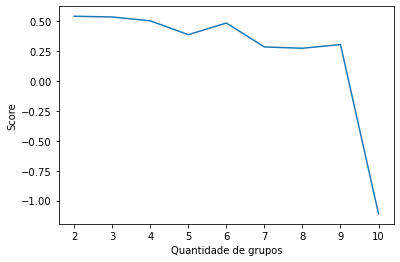

In [393]:
plt.plot(list(range(2,11,1)), kfold)
plt.xlabel("Quantidade de grupos")
plt.ylabel("Score")

In [397]:
#seed
kfold = KFold(n_splits=6, shuffle=True, random_state=0)
result = cross_val_score(lr3,x_train , y_train, cv = kfold)

In [398]:
result.mean()

0.28918919700917756

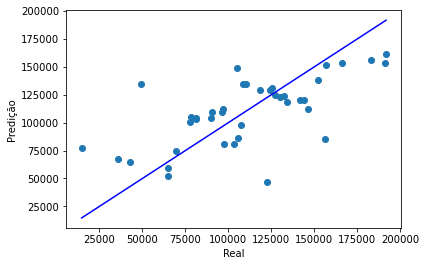

In [400]:
lr3 = lm.LinearRegression()
predicted = cross_val_predict(lr3, x_train, y_train, cv=6)

plt.scatter(y_train, predicted)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='blue')
plt.xlabel('Real')
plt.ylabel('Predição')
plt.show()